In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
trip = pd.read_csv("202309-bluebikes-tripdata.csv")
station = pd.read_csv('current_bluebikes_stations.csv')

In [3]:
station.columns = station.iloc[0]

In [4]:
station = station.drop(0,axis=0)

In [5]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 1 to 421
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Number       421 non-null    object
 1   Name         421 non-null    object
 2   Latitude     421 non-null    object
 3   Longitude    421 non-null    object
 4   District     418 non-null    object
 5   Public       421 non-null    object
 6   Total docks  421 non-null    object
dtypes: object(7)
memory usage: 23.2+ KB


In [6]:
station

,Number,Name,Latitude,Longitude,District,Public,Total docks
1,K32015,1200 Beacon St,42.34414899,-71.11467361,Brookline,Yes,15
2,W32006,160 Arsenal St,42.36466403,-71.17569387,Watertown,Yes,11
3,A32019,175 N Harvard St,42.36447457,-71.12840831,Boston,Yes,17
4,S32035,191 Beacon St,42.38032335,-71.10878613,Somerville,Yes,19
5,C32094,2 Hummingbird Lane at Olmsted Green,42.28887,-71.095003,Boston,Yes,17
...,...,...,...,...,...,...,...
417,D32022,West End Park,42.36590788,-71.06446669,Boston,Yes,35
418,N32005,West Newton,42.3496005,-71.22627497,Newton,Yes,15
419,B32059,Whittier St Health Center,42.33286288,-71.09218862,Boston,Yes,19
420,D32040,Williams St at Washington St,42.306539,-71.107669,Boston,Yes,23


In [7]:
station['Latitude'] = pd.to_numeric(station['Latitude'], errors='coerce')
station['Longitude'] = pd.to_numeric(station['Longitude'], errors='coerce')

In [8]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 1 to 421
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Number       421 non-null    object 
 1   Name         421 non-null    object 
 2   Latitude     421 non-null    float64
 3   Longitude    421 non-null    float64
 4   District     418 non-null    object 
 5   Public       421 non-null    object 
 6   Total docks  421 non-null    object 
dtypes: float64(2), object(5)
memory usage: 23.2+ KB


In [9]:
station['Total docks']=pd.to_numeric(station['Total docks'],errors = 'coerce')

In [10]:
station.rename(columns={'Number':'station_id'}, inplace = True)

In [11]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 1 to 421
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   station_id   421 non-null    object 
 1   Name         421 non-null    object 
 2   Latitude     421 non-null    float64
 3   Longitude    421 non-null    float64
 4   District     418 non-null    object 
 5   Public       421 non-null    object 
 6   Total docks  421 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 23.2+ KB


In [12]:
trip

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BC096451A56F7BBA,docked_bike,2023-09-30 01:43:08,2023-09-30 01:43:41,One Broadway / Kendall Sq at Main St / 3rd St,M32003,One Broadway / Kendall Sq at Main St / 3rd St,M32003,42.362242,-71.083111,42.362242,-71.083111,member
1,810FE5039437E9DD,docked_bike,2023-09-15 13:23:46,2023-09-15 13:37:35,Kendall T,M32004,Soldiers Field Park - 111 Western Ave,A32006,42.362428,-71.084955,42.364263,-71.118276,member
2,495332C60004ED45,docked_bike,2023-09-20 20:48:02,2023-09-20 20:58:03,Kendall T,M32004,Nashua Street at Red Auerbach Way,A32025,42.362428,-71.084955,42.365673,-71.064263,member
3,6990D089073DEC21,docked_bike,2023-09-03 22:11:38,2023-09-03 22:12:11,Williams St at Washington St,D32040,Williams St at Washington St,D32040,42.306539,-71.107669,42.306539,-71.107669,member
4,E27385143C07A3AB,docked_bike,2023-09-17 13:57:43,2023-09-17 14:13:29,Williams St at Washington St,D32040,Williams St at Washington St,D32040,42.306539,-71.107669,42.306539,-71.107669,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419869,791F405BBAA2D2E8,docked_bike,2023-09-02 18:25:32,2023-09-02 19:09:27,Salem Ferry Landing,T32001,Salem Ferry Landing,T32001,42.521893,-70.880691,42.521893,-70.880691,member
419870,E125FB55B940B642,docked_bike,2023-09-26 06:44:49,2023-09-26 07:04:19,The Lawn on D,C32028,The Lawn on D,C32028,42.344792,-71.044024,42.344792,-71.044024,casual
419871,B2FF0389F1F35E67,docked_bike,2023-09-03 15:52:58,2023-09-03 15:54:07,Boylston St at Jersey St,B32034,Boylston St at Jersey St,B32034,42.344651,-71.097325,42.344651,-71.097325,member
419872,0A450FFB0AC587D3,docked_bike,2023-09-06 08:35:02,2023-09-06 08:35:26,Brighton Mills - 370 Western Ave,A32005,Brighton Mills - 370 Western Ave,A32005,42.361546,-71.137762,42.361546,-71.137762,member


In [13]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419874 entries, 0 to 419873
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             419874 non-null  object 
 1   rideable_type       419874 non-null  object 
 2   started_at          419874 non-null  object 
 3   ended_at            419874 non-null  object 
 4   start_station_name  419874 non-null  object 
 5   start_station_id    419874 non-null  object 
 6   end_station_name    417690 non-null  object 
 7   end_station_id      417690 non-null  object 
 8   start_lat           419874 non-null  float64
 9   start_lng           419874 non-null  float64
 10  end_lat             417690 non-null  float64
 11  end_lng             417690 non-null  float64
 12  member_casual       419874 non-null  object 
dtypes: float64(4), object(9)
memory usage: 41.6+ MB


In [14]:
trip['started_at'] =pd.to_datetime(trip['started_at'])
trip['ended_at'] =pd.to_datetime(trip['ended_at'])

In [15]:
trip = trip.set_index('started_at')

## Daily usage of Blue Bikes

<AxesSubplot:xlabel='started_at'>

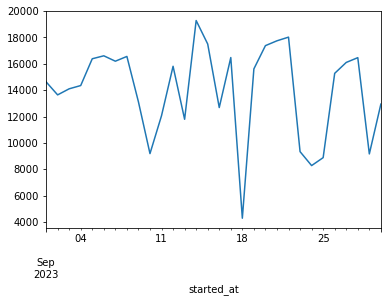

In [16]:
trip.resample("D").size().plot()

## Adding DURATION column

In [17]:
trip['Duration'] = trip['ended_at']-trip.index
trip['Duration'] = trip['Duration'].dt.total_seconds() / 60

In [18]:
trip['Duration']

started_at
2023-09-30 01:43:08     0.550000
2023-09-15 13:23:46    13.816667
2023-09-20 20:48:02    10.016667
2023-09-03 22:11:38     0.550000
2023-09-17 13:57:43    15.766667
                         ...    
2023-09-02 18:25:32    43.916667
2023-09-26 06:44:49    19.500000
2023-09-03 15:52:58     1.150000
2023-09-06 08:35:02     0.400000
2023-09-09 06:36:12    79.850000
Name: Duration, Length: 419874, dtype: float64

In [19]:
trip.sort_index(inplace=True)

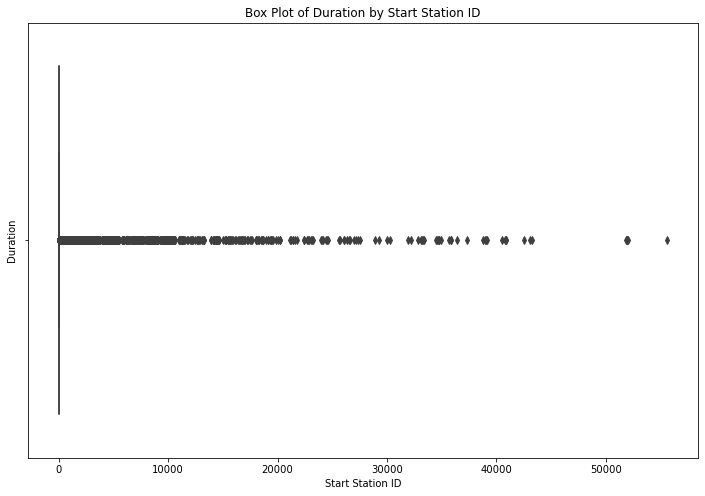

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Duration', data = trip)
plt.title('Box Plot of Duration by Start Station ID')
plt.xlabel('Start Station ID')
plt.ylabel('Duration')

plt.show()

Huge number of Outliers lets clean the data so that the average duration wont be effected because of the outliers

## NOTE: If you do not return a bike within a 24-hour period, your account may be charged a lost or stolen bike fee of $1,200 (plus tax)
https://help.bluebikes.com/hc/en-us/articles/360034926452-What-if-I-keep-a-bike-out-too-long-

In [21]:
## Number of trips which are taken for more than 24hr, as Blue bikes considers the bikes stolen or lost for rides more than 24hr
trip[trip['Duration']>1440].shape

(639, 13)

In [22]:
# Maximum duration among all the rides
trip['Duration'].max()

55611.683333333334

In [23]:
# Blue Bikes have limit for the duration of rides, if taken more than the limit according to the eligibility the riders will be charged additionall
# Lets Keep a Limit of 4 hour 
trip[trip['Duration']>240].shape

(1820, 13)

In [24]:
trip.isna().sum()

ride_id                  0
rideable_type            0
ended_at                 0
start_station_name       0
start_station_id         0
end_station_name      2184
end_station_id        2184
start_lat                0
start_lng                0
end_lat               2184
end_lng               2184
member_casual            0
Duration                 0
dtype: int64

In [25]:
## Its observed that, there are few null values in the columns associated with end location even though there is end time
# lets consider the trips with no end location as undocked
undocked_trip = trip[trip['end_station_id'].isna()]
undocked_trip

,ride_id,rideable_type,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Duration
started_at,,,,,,,,,,,,,
2023-09-01 00:24:30,EA874C8ACA2770E9,docked_bike,2023-09-01 07:32:35,W Broadway at Dorchester St,C32016,NaN,NaN,42.335959,-71.046229,NaN,NaN,casual,428.083333
2023-09-01 05:24:22,7877606B49E80F53,docked_bike,2023-09-01 05:28:28,Boston Landing,A32045,NaN,NaN,42.356561,-71.141675,NaN,NaN,casual,4.100000
2023-09-01 06:02:39,B3E6ABF3ABF93616,docked_bike,2023-09-01 10:39:15,Stuart St at Charles St,D32011,NaN,NaN,42.351146,-71.066289,NaN,NaN,casual,276.600000
2023-09-01 07:49:32,FE51CE3D570CD09F,docked_bike,2023-09-01 12:15:23,Coolidge Corner - Beacon St at Centre St,K32001,NaN,NaN,42.341598,-71.123338,NaN,NaN,member,265.850000
2023-09-01 08:12:46,2DAB7B6A9F06059C,docked_bike,2023-09-01 08:14:13,Aquarium T Stop - 200 Atlantic Ave,B32004,NaN,NaN,42.359912,-71.051430,NaN,NaN,member,1.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30 22:44:16,58A904F75BCA7EB8,docked_bike,2023-09-30 22:44:46,Christian Science Plaza - Massachusetts Ave at...,B32005,NaN,NaN,42.343666,-71.085824,NaN,NaN,casual,0.500000
2023-09-30 23:10:33,5A19C95A5F65C380,docked_bike,2023-10-06 13:23:00,Nashua Street at Red Auerbach Way,A32025,NaN,NaN,42.365673,-71.064263,NaN,NaN,casual,8052.450000
2023-09-30 23:11:11,4B10763122E3D6C9,docked_bike,2023-10-06 13:31:49,Nashua Street at Red Auerbach Way,A32025,NaN,NaN,42.365673,-71.064263,NaN,NaN,casual,8060.633333


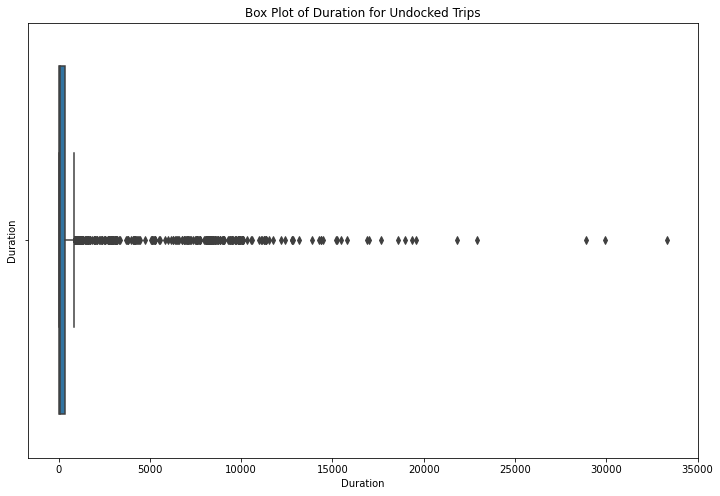

In [26]:
## Analyzing the Duration of undocked trips
plt.figure(figsize=(12, 8))
sns.boxplot(x='Duration', data = undocked_trip)
plt.title('Box Plot of Duration for Undocked Trips')
plt.xlabel('Duration')
plt.ylabel('Duration')
plt.show()

In [27]:
undocked_trip[undocked_trip['Duration']>240].shape

(672, 13)

In [28]:
undocked_trip[undocked_trip['Duration']>1440].shape

(257, 13)

## The reason for null values in the end station can be many, as there might be Techniocal issues with docking and it might not be reported or the bikes might have been stolen or found out to be stolen or have been kept a side after reporting. 

In [29]:
## Grouping the Starting station where undocked trips are found and aggreagting the count for duration
# greater that 24hr, b/w 4hr to 24hr, less than 24 hr
undocked_stations= undocked_trip.groupby('start_station_id').agg(
    total_count=pd.NamedAgg(column='Duration', aggfunc='size'),
    duration_gt_1440=pd.NamedAgg(column='Duration', aggfunc=lambda x: (x > 1440).sum()),
    duration_240_to_1440=pd.NamedAgg(column='Duration', aggfunc=lambda x: ((x >= 240) & (x <= 1440)).sum()),
    duration_lt_240=pd.NamedAgg(column='Duration', aggfunc=lambda x: (x < 240).sum())
).reset_index().sort_values('total_count', ascending=False)
undocked_stations 

,start_station_id,total_count,duration_gt_1440,duration_240_to_1440,duration_lt_240
230,M32006,43,2,7,34
239,M32018,42,0,10,32
260,M32041,30,1,3,26
155,D32016,29,3,8,18
261,M32042,27,0,5,22
...,...,...,...,...,...
222,L32002,1,0,0,1
224,L32004,1,0,0,1
58,B32022,1,1,0,0
225,L32005,1,0,1,0


In [30]:
undocked_stations.rename(columns={'start_station_id':'station_id'},inplace = True)

In [31]:
undocked_station_data = pd.merge(undocked_stations,station,on='station_id',how ='inner')
undocked_station_data

,station_id,total_count,duration_gt_1440,duration_240_to_1440,duration_lt_240,Name,Latitude,Longitude,District,Public,Total docks
0,M32006,43,2,7,34,MIT at Mass Ave / Amherst St,42.358100,-71.093198,Cambridge,Yes,27
1,M32018,42,0,10,32,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,Cambridge,Yes,19
2,M32041,30,1,3,26,MIT Pacific St at Purrington St,42.359573,-71.101295,Cambridge,Yes,19
3,D32016,29,3,8,18,Charles Circle - Charles St at Cambridge St,42.360793,-71.071190,Boston,Yes,19
4,M32042,27,0,5,22,MIT Vassar St,42.355601,-71.103945,Cambridge,Yes,53
...,...,...,...,...,...,...,...,...,...,...,...
316,K32010,1,0,0,1,High St at Cypress St,42.324645,-71.121352,Brookline,Yes,15
317,L32002,1,0,0,1,Linwood St at Minuteman Bikeway,42.409354,-71.149065,Arlington,Yes,11
318,B32022,1,1,0,0,Roxbury YMCA - Warren St at MLK Blvd,42.317873,-71.082431,Boston,Yes,10
319,L32005,1,0,1,0,Thorndike Field at Minuteman Bikeway,42.400168,-71.144570,Arlington,Yes,11


In [37]:
undocked_station_district = undocked_station_data.groupby('District')['total_count'].sum().reset_index()
undocked_station_district = pd.DataFrame(undocked_station_district)
undocked_station_district

,District,total_count
0,Arlington,5
1,Boston,1002
2,Brookline,57
3,Cambridge,771
4,Chelsea,1
5,Everett,14
6,Malden,4
7,Medford,4
8,Newton,15
9,Revere,1


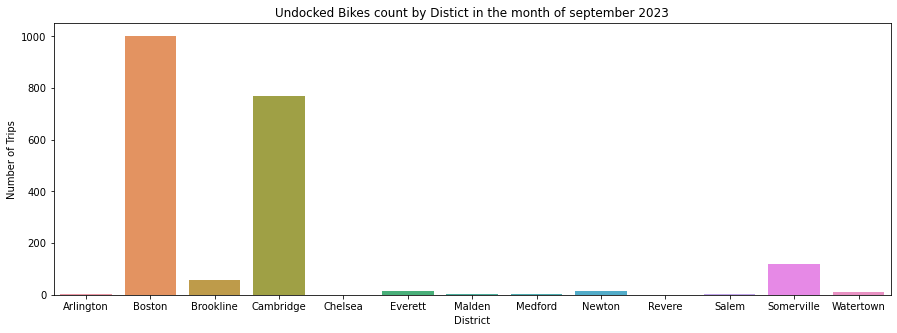

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x='District',y='total_count',data=undocked_station_district )
plt.title("Undocked Bikes count by Distict in the month of september 2023")
plt.xlabel("District")
plt.ylabel("Number of Trips")
plt.show()

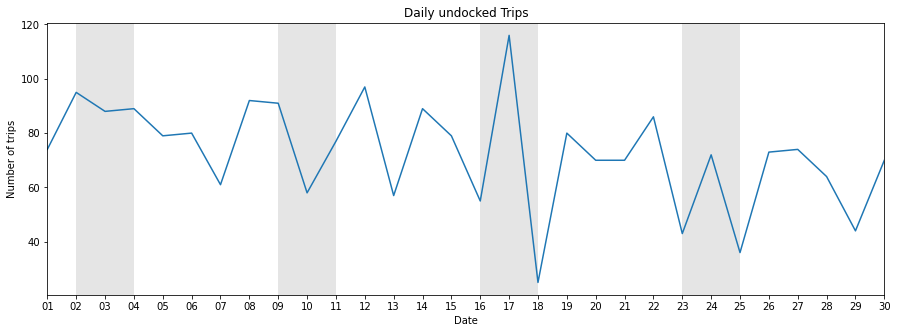

In [42]:
plt.figure(figsize=(15,5))
undocked_trip.resample('D').size().plot()
plt.title("Daily undocked Trips")
plt.xlabel("Date")
plt.ylabel("Number of trips")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
start, end = undocked_trip.index.min(), undocked_trip.index.max()
delta = pd.Timedelta(days=1)

while start <= end:
    if start.weekday() >= 5:  
        plt.axvspan(start, start + delta, facecolor='gray', edgecolor='none', alpha=0.2)
    start += delta
plt.show()

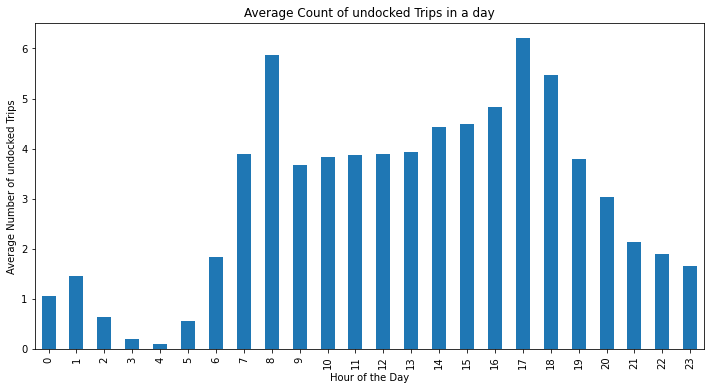

In [43]:
undocked_counts = undocked_trip.resample('H').size()
undocked_hourly_counts = undocked_counts.groupby(undocked_counts.index.hour).mean()
plt.figure(figsize=(12, 6))
undocked_hourly_counts.plot(kind='bar') 
plt.title('Average Count of undocked Trips in a day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of undocked Trips')
plt.show()


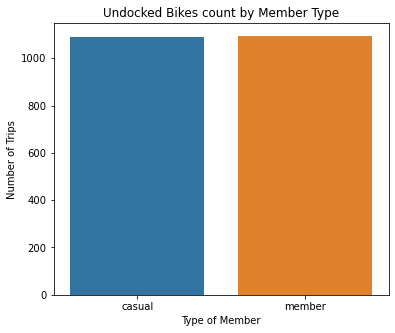

In [44]:
plt.figure(figsize=(6,5))
sns.countplot(x='member_casual', data=undocked_trip)
plt.title("Undocked Bikes count by Member Type")
plt.xlabel("Type of Member")
plt.ylabel("Number of Trips")
plt.show()

## Lets Consider 24 hr period as notice period where users are charged for stolen or lost bike

In [53]:
notice_trip=trip[trip['Duration']>1440]
notice_trip

,ride_id,rideable_type,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Duration
started_at,,,,,,,,,,,,,
2023-09-01 08:32:42,F6EA986ACE382E42,docked_bike,2023-10-07 08:12:09,Columbia Rd at Ceylon St,B32029,18 Dorrance Warehouse,X32999,42.309572,-71.072900,42.387151,-71.075978,casual,51819.450000
2023-09-01 08:42:15,47DDCEB3807F8F18,docked_bike,2023-09-04 15:12:54,Charles Circle - Charles St at Cambridge St,D32016,NaN,NaN,42.360793,-71.071190,NaN,NaN,casual,4710.650000
2023-09-01 09:48:17,0EBE1E15FC2C27E1,docked_bike,2023-09-28 12:03:50,Sidney Research Campus/Erie Street at Waverly,M32047,18 Dorrance Warehouse,X32999,42.357753,-71.103934,42.387151,-71.075978,member,39015.550000
2023-09-01 10:53:30,34FA3B6C708D8976,docked_bike,2023-09-11 08:04:27,Beacon at Walnut,N32012,Beacon at Walnut,N32012,42.330062,-71.206684,42.330062,-71.206684,casual,14230.950000
2023-09-01 11:28:38,D9DBE13D1ACFE638,docked_bike,2023-09-11 08:03:13,Brighton Ave at Linden St,D32058,West End Park,D32022,42.352838,-71.129675,42.365908,-71.064467,casual,14194.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30 19:48:51,2EB23A6BFEC3A7C0,docked_bike,2023-10-02 09:15:20,Forest Hills,E32010,Boston Medical Center - E Concord St at Harris...,C32002,42.300923,-71.114249,42.336399,-71.073067,casual,2246.483333
2023-09-30 23:10:33,5A19C95A5F65C380,docked_bike,2023-10-06 13:23:00,Nashua Street at Red Auerbach Way,A32025,NaN,NaN,42.365673,-71.064263,NaN,NaN,casual,8052.450000
2023-09-30 23:11:11,4B10763122E3D6C9,docked_bike,2023-10-06 13:31:49,Nashua Street at Red Auerbach Way,A32025,NaN,NaN,42.365673,-71.064263,NaN,NaN,casual,8060.633333


In [46]:
notice_station=notice_trip.groupby('start_station_id').size().reset_index(name='Total count').sort_values('Total count',ascending = False)
notice_station

,start_station_id,Total count
34,B32010,11
51,B32034,9
9,A32010,9
33,B32008,9
27,B32000,8
...,...,...
154,D32050,1
155,D32053,1
163,E32005,1
164,E32007,1


In [47]:
notice_station.rename(columns={'start_station_id':"station_id"},inplace = True)

In [48]:
notice_station_data = pd.merge(notice_station, station, on='station_id',how='inner')
notice_station_data

,station_id,Total count,Name,Latitude,Longitude,District,Public,Total docks
0,B32010,11,Kenmore Square,42.348706,-71.097009,Boston,Yes,26
1,B32034,9,Boylston St at Jersey St,42.344651,-71.097325,Boston,Yes,15
2,A32010,9,South Station - 700 Atlantic Ave,42.352175,-71.055547,Boston,Yes,47
3,B32008,9,Boston City Hall - 28 State St,42.358920,-71.057629,Boston,Yes,25
4,D32014,7,Tremont St at West St,42.354979,-71.063348,Boston,Yes,15
...,...,...,...,...,...,...,...,...
250,D32049,1,Stuart St at Berkeley St,42.349544,-71.072421,Boston,Yes,19
251,D32053,1,Sullivan Square,42.384452,-71.075149,Boston,Yes,19
252,E32005,1,Green Street T Stop - Green St at Amory St,42.310579,-71.107341,Boston,Yes,23
253,E32007,1,S Huntington Ave at Heath St,42.327604,-71.110892,Boston,Yes,15


In [50]:
notice_station_district = notice_station_data.groupby('District')['Total count'].sum().reset_index()
notice_station_district = pd.DataFrame(notice_station_district)
notice_station_district

,District,Total count
0,Arlington,1
1,Boston,395
2,Brookline,18
3,Cambridge,75
4,Chelsea,1
5,Everett,11
6,Malden,11
7,Medford,4
8,Newton,15
9,Revere,4


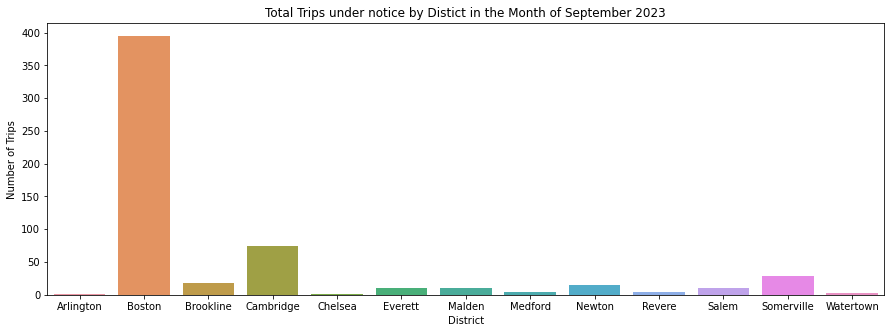

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(x='District', y='Total count',data=notice_station_district)
plt.title("Total Trips under notice by Distict in the Month of September 2023")
plt.xlabel("District")
plt.ylabel("Number of Trips")
plt.show() 

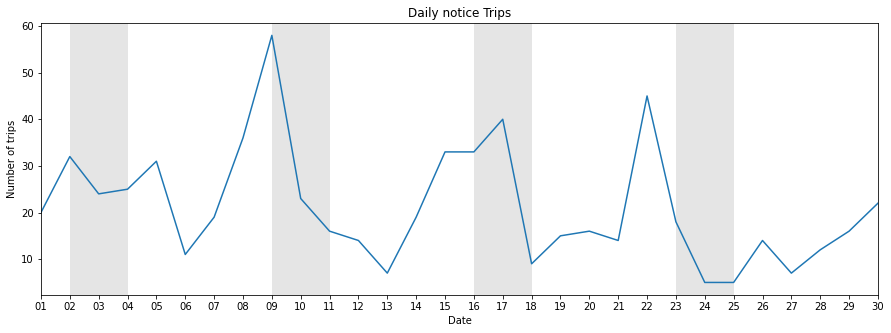

In [56]:
plt.figure(figsize=(15,5))
notice_trip.resample('D').size().plot()
plt.title("Daily notice Trips")
plt.xlabel("Date")
plt.ylabel("Number of trips")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
start, end = notice_trip.index.min(), notice_trip.index.max()
delta = pd.Timedelta(days=1)

while start <= end:
    if start.weekday() >= 5: 
        plt.axvspan(start, start + delta, facecolor='gray', edgecolor='none', alpha=0.2)
    start += delta
plt.show()

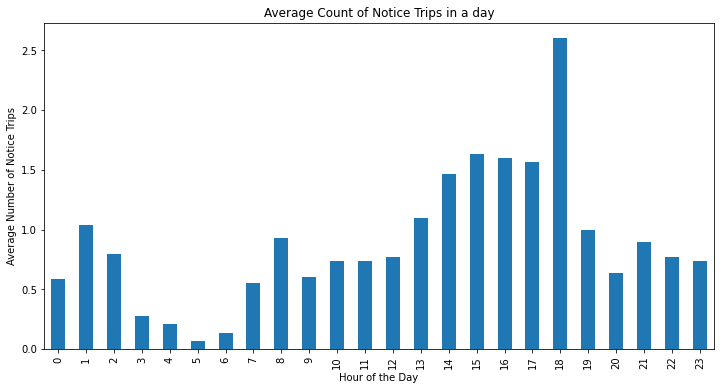

In [57]:
notice_counts = notice_trip.resample('H').size()
notice_hourly_counts = notice_counts.groupby(notice_counts.index.hour).mean()
plt.figure(figsize=(12, 6))
notice_hourly_counts.plot(kind='bar') 
plt.title('Average Count of Notice Trips in a day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Notice Trips')
plt.show()


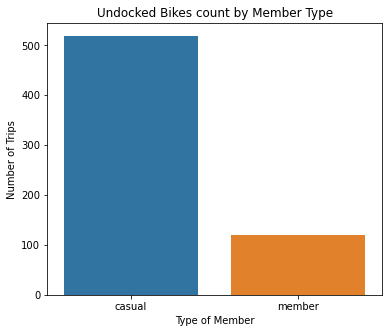

In [58]:
plt.figure(figsize=(6,5))
sns.countplot(x='member_casual', data=notice_trip)
plt.title("Undocked Bikes count by Member Type")
plt.xlabel("Type of Member")
plt.ylabel("Number of Trips")
plt.show()

## similarly lets analyze the trips which are long i.e the trips with duration between 240 and 1440. Also lets consider only trips where the end location information is available. 
### Analyzing the trend on what days of the week or which day has seen long rides. and at what time of the day are long trips observed. Lets also analyze the stations, districts and routes where these long trips have taken place

In [59]:
long_trip=trip[(trip['Duration'] > 240) & (trip['Duration'] < 1440) & (~trip['end_station_id'].isna())]
long_trip

,ride_id,rideable_type,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Duration
started_at,,,,,,,,,,,,,
2023-09-01 02:51:07,EECF69B2DEBC2736,docked_bike,2023-09-01 07:07:57,Kennedy-Longfellow School 158 Spring St,M32065,Ames St at Main St,M32037,42.369553,-71.085790,42.362500,-71.088220,casual,256.833333
2023-09-01 08:30:06,0FC5B5EBDEC1ED23,docked_bike,2023-09-02 01:36:28,Valenti Way at Haverhill St,A32053,Conway Park - Somerville Avenue,S32004,42.364739,-71.059349,42.383639,-71.108537,casual,1026.366667
2023-09-01 08:30:39,7EC08BD872F13E28,docked_bike,2023-09-01 18:06:04,Mayor Salvo Path at Mill St,T32004,Salem MBTA - Washington at Federal St,T32005,42.518035,-70.895701,42.523452,-70.896111,casual,575.416667
2023-09-01 09:26:40,A3C51AC3B176DB9D,docked_bike,2023-09-01 17:31:18,Commonwealth Ave at Agganis Way,A32002,Prudential Center - 101 Huntington Ave,C32007,42.351692,-71.119035,42.346520,-71.080658,casual,484.633333
2023-09-01 10:25:03,D1CFA08C96D74440,docked_bike,2023-09-01 14:52:47,Tremont St at West St,D32014,Tremont St at West St,D32014,42.354979,-71.063348,42.354979,-71.063348,casual,267.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30 17:25:55,7FC9D9FF9B424FB9,docked_bike,2023-09-30 21:55:51,Congress St at Boston City Hall,D32009,One Kendall Square at Hampshire St / Portland St,M32002,42.360418,-71.057522,42.366277,-71.091690,casual,269.933333
2023-09-30 20:05:47,F53FA752A22060ED,docked_bike,2023-10-01 10:57:44,Clarendon St at Newbury St,D32047,Tremont St at Hamilton Pl,B32056,42.351597,-71.075617,42.356683,-71.061666,casual,891.950000
2023-09-30 21:36:59,F0668C74627A24CA,docked_bike,2023-10-01 01:48:16,Commonwealth Ave at Agganis Way,A32002,Silber Way,D32032,42.351692,-71.119035,42.349496,-71.100576,member,251.283333


In [60]:
long_routes=long_trip.groupby(['start_station_id','end_station_id']).size().reset_index(name='Total count').sort_values('Total count',ascending = False)
long_routes

,start_station_id,end_station_id,Total count
481,L32002,L32002,4
174,B32032,A32002,3
662,S32022,S32022,3
578,M32046,M32046,3
120,B32007,B32007,3
...,...,...,...
252,C32018,C32051,1
253,C32019,C32019,1
254,C32020,C32020,1
255,C32022,B32063,1


In [61]:
long_routes[long_routes['Total count']>2].shape

(9, 3)

In [62]:
long_station = long_trip.groupby('start_station_id').size().reset_index(name='Total count').sort_values('Total count',ascending = False)
long_station

,start_station_id,Total count
194,M32018,16
122,D32017,14
47,B32018,13
59,B32058,11
40,B32010,11
...,...,...
100,C32083,1
101,C32086,1
103,C32091,1
104,C32093,1


In [63]:
long_station.rename(columns={'start_station_id':'station_id'},inplace=True)


In [64]:
long_station_data = pd.merge(long_station,station, on='station_id',how='inner')
long_station_data

,station_id,Total count,Name,Latitude,Longitude,District,Public,Total docks
0,M32018,16,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,Cambridge,Yes,19
1,D32017,14,Mugar Way at Beacon St,42.355536,-71.072869,Boston,Yes,19
2,B32018,13,Boylston St at Massachusetts Ave,42.347406,-71.086784,Boston,Yes,15
3,B32058,11,Lansdowne T Stop,42.347345,-71.100168,Boston,Yes,27
4,B32010,11,Kenmore Square,42.348706,-71.097009,Boston,Yes,26
...,...,...,...,...,...,...,...,...
246,C32066,1,Dorchester Ave at King St,42.291718,-71.062571,Boston,Yes,15
247,C32086,1,Centre St at Parkway YMCA,42.282779,-71.157289,Boston,Yes,17
248,C32091,1,645 Summer St,42.341781,-71.039870,Boston,Yes,19
249,C32093,1,Harrison Ave at E. Dedham St,42.339194,-71.069750,Boston,Yes,19


In [65]:
long_station_district = long_station_data.groupby('District')['Total count'].sum().reset_index()
long_station_district 

,District,Total count
0,Arlington,8
1,Boston,419
2,Brookline,19
3,Cambridge,154
4,Chelsea,2
5,Everett,6
6,Malden,3
7,Medford,2
8,Newton,3
9,Revere,6


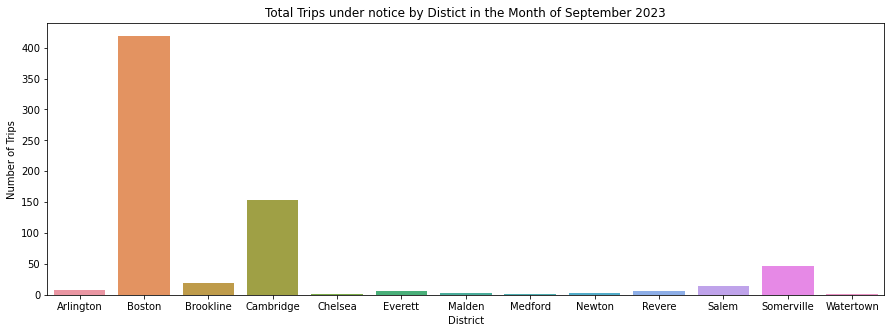

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(x='District',y='Total count', data=long_station_district)
plt.title("Total Trips under notice by Distict in the Month of September 2023")
plt.xlabel("District")
plt.ylabel("Number of Trips")
plt.show()

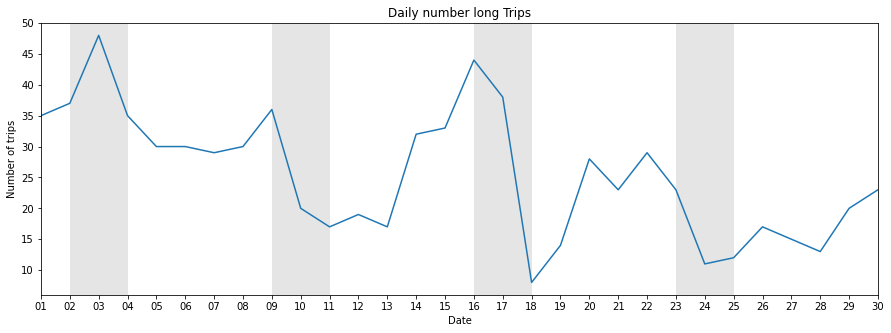

In [69]:
plt.figure(figsize=(15,5))
long_trip.resample('D').size().plot()
plt.title("Daily number long Trips")
plt.xlabel("Date")
plt.ylabel("Number of trips")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
start, end = notice_trip.index.min(), notice_trip.index.max()
delta = pd.Timedelta(days=1)

while start <= end:
    if start.weekday() >= 5:  # 5 and 6 correspond to Saturday and Sunday
        plt.axvspan(start, start + delta, facecolor='gray', edgecolor='none', alpha=0.2)
    start += delta
plt.show() 

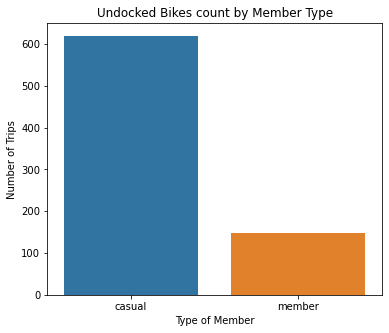

In [70]:
plt.figure(figsize=(6,5))
sns.countplot(x='member_casual', data=long_trip)
plt.title("Undocked Bikes count by Member Type")
plt.xlabel("Type of Member")
plt.ylabel("Number of Trips")
plt.show()

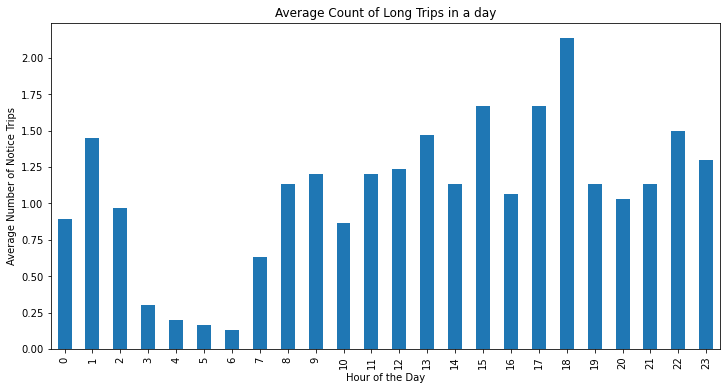

In [71]:
long_counts = long_trip.resample('H').size()
long_hourly_counts = long_counts.groupby(long_counts.index.hour).mean()
plt.figure(figsize=(12, 6))
long_hourly_counts.plot(kind='bar') 
plt.title('Average Count of Long Trips in a day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Notice Trips')
plt.show()


## Lets clean the trip data to analyze the patterns as the outlier trips effect the calculation for average duration and the trend 
### filter the trips with duration only <240 and with no null values in the end station data

In [72]:
fair_trip = trip[(trip['Duration']<240) & (~trip['end_station_id'].isna())]

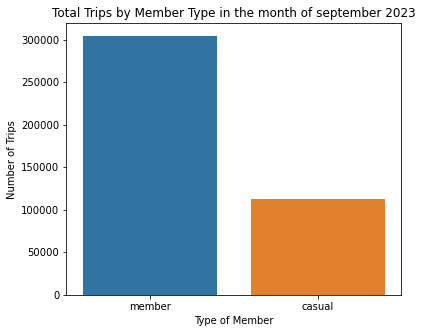

In [73]:
plt.figure(figsize=(6,5))
sns.countplot(x='member_casual', data=fair_trip)
plt.title("Total Trips by Member Type in the month of september 2023")
plt.xlabel("Type of Member")
plt.ylabel("Number of Trips")
plt.show()

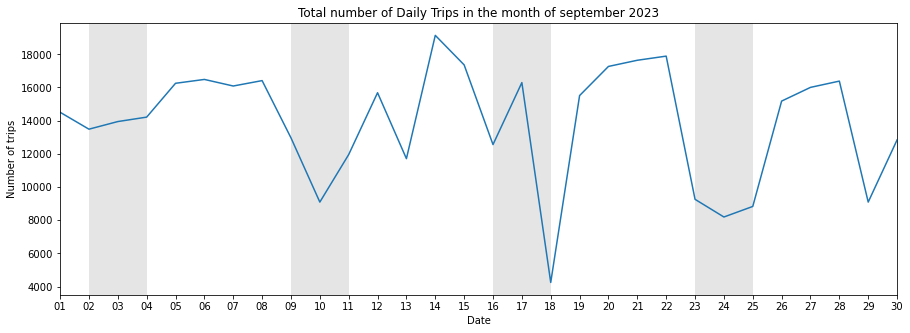

In [74]:
plt.figure(figsize=(15,5))
fair_trip.resample('D').size().plot()
plt.title("Total number of Daily Trips in the month of september 2023")
plt.xlabel("Date")
plt.ylabel("Number of trips")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
start, end = notice_trip.index.min(), notice_trip.index.max()
delta = pd.Timedelta(days=1)

while start <= end:
    if start.weekday() >= 5: 
        plt.axvspan(start, start + delta, facecolor='gray', edgecolor='none', alpha=0.2)
    start += delta
plt.show()

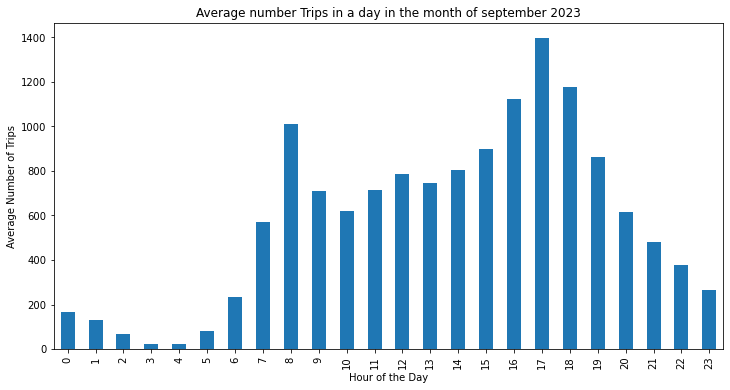

In [75]:
fair_counts = fair_trip.resample('H').size()
fair_hourly_counts = fair_counts.groupby(fair_counts.index.hour).mean()
plt.figure(figsize=(12, 6))
fair_hourly_counts.plot(kind='bar') 
plt.title('Average number Trips in a day in the month of september 2023')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.show()


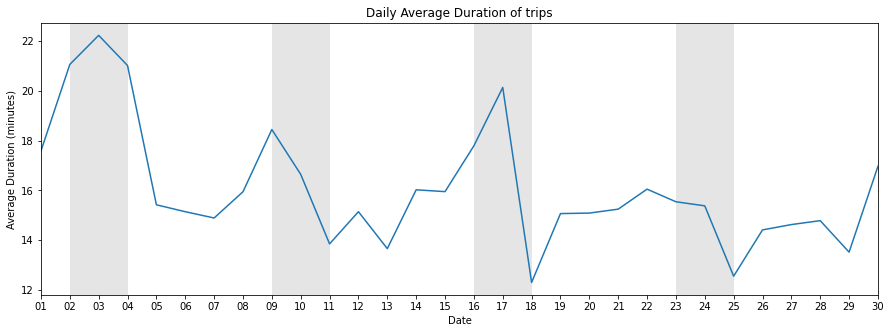

In [77]:
plt.figure(figsize=(15,5))
fair_trip['Duration'].resample('D').mean().plot()
plt.title("Daily Average Duration of trips")
plt.xlabel("Date")
plt.ylabel("Average Duration (minutes)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
start, end = fair_trip.index.min(), fair_trip.index.max()
delta = pd.Timedelta(days=1)

while start <= end:
    if start.weekday() >= 5:  
        plt.axvspan(start, start + delta, facecolor='gray', edgecolor='none', alpha=0.2)
    start += delta
plt.show()

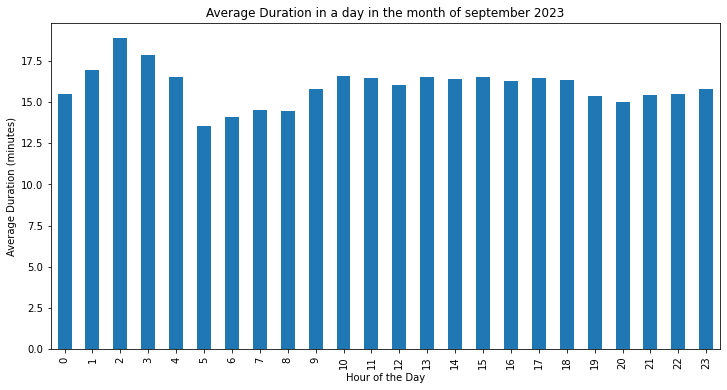

In [79]:
fair_duration = fair_trip['Duration'].resample('H').mean()
fair_hourly_duration = fair_duration.groupby(fair_duration.index.hour).mean()
plt.figure(figsize=(12, 6))
fair_hourly_duration.plot(kind='bar') 
plt.title('Average Duration in a day in the month of september 2023')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Duration (minutes)')
plt.show()


In [80]:
member_trip = fair_trip[fair_trip['member_casual']=='member']
casual_trip = fair_trip[fair_trip['member_casual']=='casual']

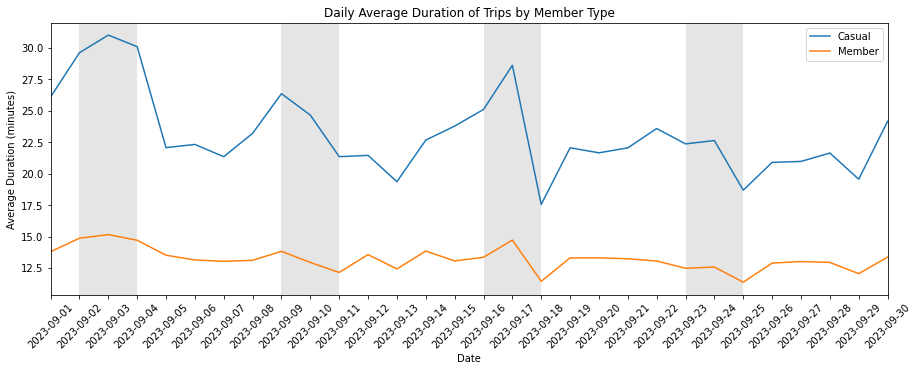

In [81]:
plt.figure(figsize=(15, 5))
casual_trip['Duration'].resample('D').mean().plot(label='Casual')
member_trip['Duration'].resample('D').mean().plot(label='Member')
plt.title("Daily Average Duration of Trips by Member Type")
plt.xlabel("Date")
plt.ylabel("Average Duration (minutes)")
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
start = min(casual_trip.index.min(), member_trip.index.min())
end = max(casual_trip.index.max(), member_trip.index.max())
delta = pd.Timedelta(days=1)

while start <= end:
    if start.weekday() >= 5:  
        plt.axvspan(start, start + delta, facecolor='gray', edgecolor='none', alpha=0.2)
    start += delta
plt.xticks(rotation=45)
plt.show()


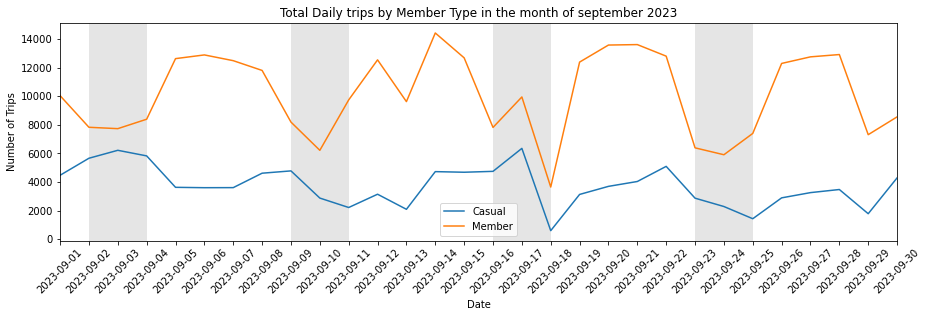

In [82]:
plt.figure(figsize=(15, 4))
casual_trip.resample('D').size().plot(label='Casual')
member_trip.resample('D').size().plot(label='Member')
plt.title("Total Daily trips by Member Type in the month of september 2023")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
start = min(casual_trip.index.min(), member_trip.index.min())
end = max(casual_trip.index.max(), member_trip.index.max())
delta = pd.Timedelta(days=1)

while start <= end:
    if start.weekday() >= 5:  
        plt.axvspan(start, start + delta, facecolor='gray', edgecolor='none', alpha=0.2)
    start += delta
plt.xticks(rotation=45)
plt.show()


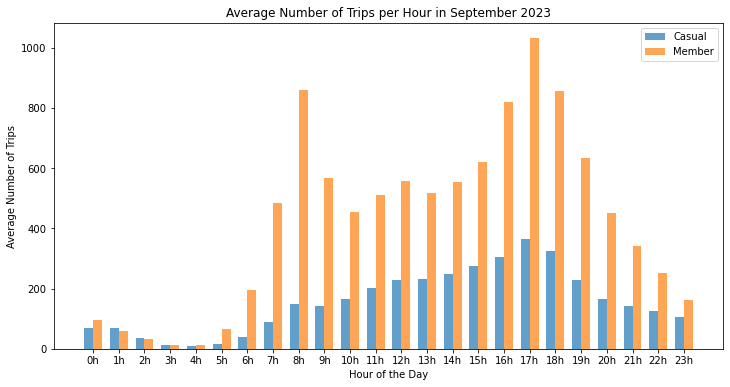

In [64]:
casual_counts = casual_trip.resample('H').size()
member_counts = member_trip.resample('H').size()
casual_hourly_counts = casual_counts.groupby(casual_counts.index.hour).mean()
member_hourly_counts = member_counts.groupby(member_counts.index.hour).mean()

plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(24) 
casual_bar_positions = index - bar_width / 2
member_bar_positions = index + bar_width / 2
plt.bar(casual_bar_positions, casual_hourly_counts, width=bar_width, label='Casual', alpha=0.7)
plt.bar(member_bar_positions, member_hourly_counts, width=bar_width, label='Member', alpha=0.7)

plt.title('Average Number of Trips per Hour in September 2023')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.xticks(index, [f'{i}h' for i in range(24)])
plt.legend()

plt.show()


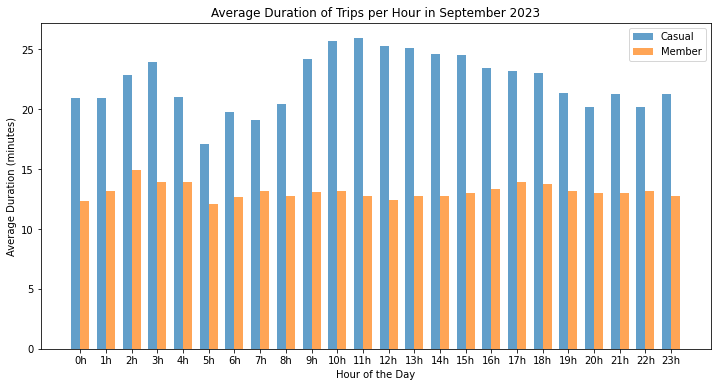

In [83]:
casual_duration = casual_trip['Duration'].resample('H').mean()
member_duration = member_trip['Duration'].resample('H').mean()
casual_hourly_duration = casual_duration.groupby(casual_duration.index.hour).mean()
member_hourly_duration = member_duration.groupby(member_duration.index.hour).mean()

plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(24) 
casual_bar_positions = index - bar_width / 2
member_bar_positions = index + bar_width / 2
plt.bar(casual_bar_positions, casual_hourly_duration, width=bar_width, label='Casual', alpha=0.7)
plt.bar(member_bar_positions, member_hourly_duration, width=bar_width, label='Member', alpha=0.7)

plt.title('Average Duration of Trips per Hour in September 2023')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Duration (minutes)')
plt.xticks(index, [f'{i}h' for i in range(24)])
plt.legend()

plt.show()

In [84]:
member_routes=member_trip.groupby(['start_station_id','end_station_id']).size().reset_index(name='Total count').sort_values('Total count',ascending = False)
casual_routes=casual_trip.groupby(['start_station_id','end_station_id']).size().reset_index(name='Total count').sort_values('Total count',ascending = False)

In [85]:
member_routes.head()

,start_station_id,end_station_id,Total count
28053,M32006,B32016,836
7339,B32016,M32006,731
28204,M32006,M32042,501
33824,M32042,M32037,463
33800,M32042,M32006,457


In [86]:
casual_routes.head()

,start_station_id,end_station_id,Total count
22999,M32024,M32018,186
22210,M32018,M32024,169
14684,D32017,D32017,161
20710,M32006,B32016,155
20805,M32006,M32018,152


In [87]:
fair_trip.columns

Index(['ride_id', 'rideable_type', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'member_casual', 'Duration'],
      dtype='object')

In [88]:
fair_routes = fair_trip.groupby(['start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng']).size().reset_index(name='Total count')
fair_routes = fair_routes.sort_values('Total count', ascending=False)


In [89]:
fair_routes[fair_routes['Total count']>30].shape

(2391, 7)

In [90]:
fair_routes_25 = fair_routes.head(25)
fair_routes_25 

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,Total count
33557,M32006,B32016,42.358100,-71.093198,42.350827,-71.089811,991
8660,B32016,M32006,42.350827,-71.089811,42.358100,-71.093198,882
35772,M32018,M32024,42.373268,-71.118579,42.380287,-71.125107,626
33723,M32006,M32042,42.358100,-71.093198,42.355601,-71.103945,535
36969,M32024,M32018,42.380287,-71.125107,42.373268,-71.118579,534
39989,M32042,M32006,42.355601,-71.103945,42.358100,-71.093198,506
40015,M32042,M32037,42.355601,-71.103945,42.362500,-71.088220,505
369,A32002,B32060,42.351692,-71.119035,42.349609,-71.103915,477
39988,M32042,M32005,42.355601,-71.103945,42.362131,-71.091156,449
24909,D32032,A32002,42.349496,-71.100576,42.351692,-71.119035,437


## MEMBER
### Monthly and annual members: the first 45 minutes of each ride are included in the membership price. If you keep a bike out for longer than 45 minutes at a time, you will be charged an extra $2.50 for each additional 30 minutes. Corporate members are also responsible for extra time fees.


In [92]:
# Assuming 'member_trip' is your DataFrame and 'Duration' is in minutes

total_member_trips = member_trip.shape[0]  
total_member_trips_gt_45 = member_trip[member_trip['Duration'] >= 45].shape[0]  

print(f"Total member trips: {total_member_trips} and Total member trips which are greater than 45 minutes: {total_member_trips_gt_45}")


Total member trips: 304412 and Total member trips which are greater than 45 minutes: 3662


# CIRCULAR TRIPS

In [93]:
circular_trip = fair_trip[fair_trip['start_station_id']==fair_trip['end_station_id']]

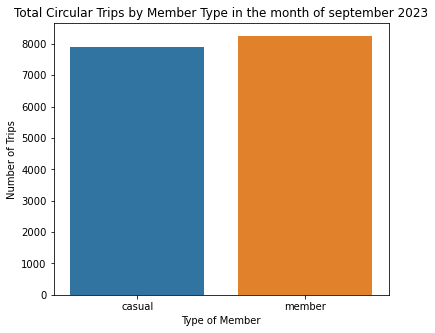

In [94]:
plt.figure(figsize=(6,5))
sns.countplot(x='member_casual', data=circular_trip)
plt.title("Total Circular Trips by Member Type in the month of september 2023")
plt.xlabel("Type of Member")
plt.ylabel("Number of Trips")
plt.show()

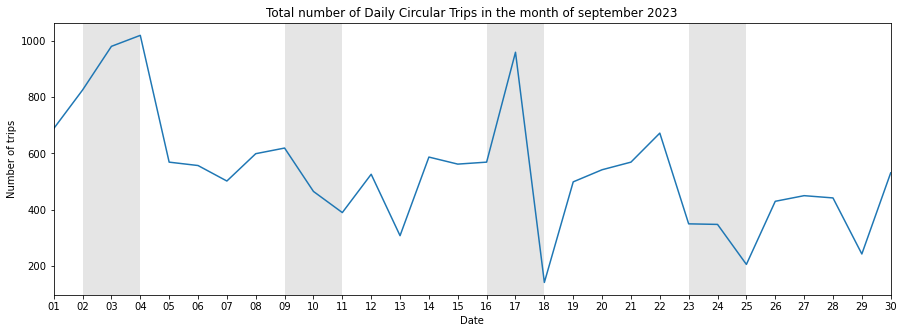

In [95]:
plt.figure(figsize=(15,5))
circular_trip.resample('D').size().plot()
plt.title("Total number of Daily Circular Trips in the month of september 2023")
plt.xlabel("Date")
plt.ylabel("Number of trips")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
start, end = notice_trip.index.min(), notice_trip.index.max()
delta = pd.Timedelta(days=1)

while start <= end:
    if start.weekday() >= 5:  # 5 and 6 correspond to Saturday and Sunday
        plt.axvspan(start, start + delta, facecolor='gray', edgecolor='none', alpha=0.2)
    start += delta
plt.show()

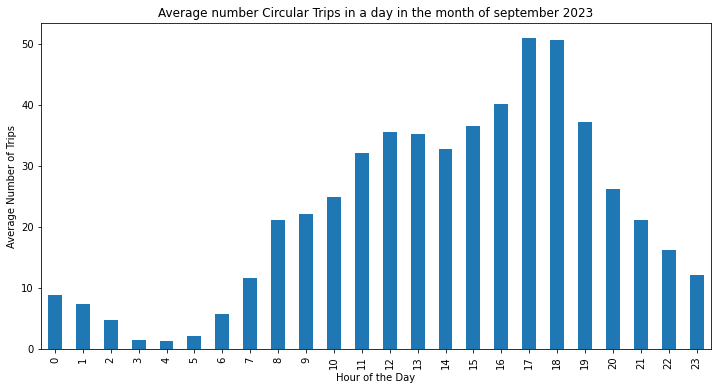

In [99]:
circular_counts = circular_trip.resample('H').size()
circular_hourly_counts = circular_counts.groupby(circular_counts.index.hour).mean()
plt.figure(figsize=(12, 6))
circular_hourly_counts.plot(kind='bar') 
plt.title('Average number Circular Trips in a day in the month of september 2023')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.show()

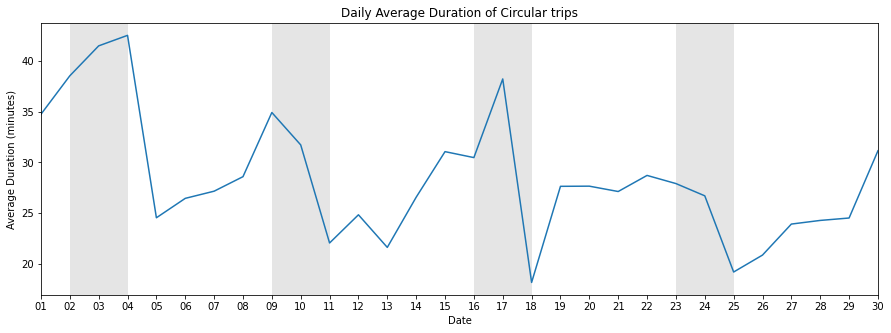

In [97]:
plt.figure(figsize=(15,5))
circular_trip['Duration'].resample('D').mean().plot()
plt.title("Daily Average Duration of Circular trips")
plt.xlabel("Date")
plt.ylabel("Average Duration (minutes)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
start, end = notice_trip.index.min(), notice_trip.index.max()
delta = pd.Timedelta(days=1)

while start <= end:
    if start.weekday() >= 5:  # 5 and 6 correspond to Saturday and Sunday
        plt.axvspan(start, start + delta, facecolor='gray', edgecolor='none', alpha=0.2)
    start += delta
plt.show()

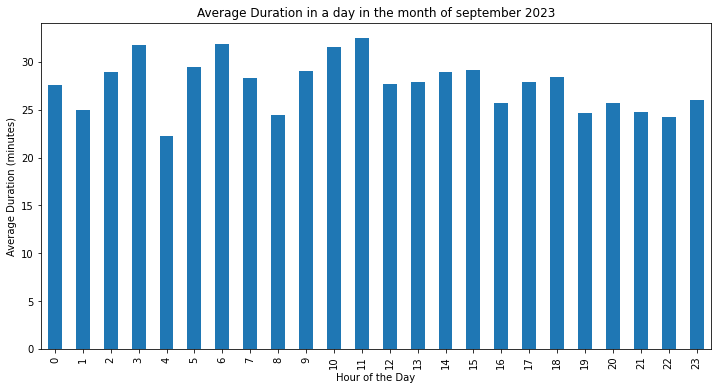

In [98]:
circular_duration = circular_trip['Duration'].resample('H').mean()
circular_hourly_duration = circular_duration.groupby(circular_duration.index.hour).mean()
plt.figure(figsize=(12, 6))
circular_hourly_duration.plot(kind='bar') 
plt.title('Average Duration in a day in the month of september 2023')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Duration (minutes)')
plt.show()

In [100]:
circular_routes= circular_trip.groupby(['start_station_id','end_station_id']).size().reset_index(name='Total count').sort_values('Total count',ascending = False)

In [101]:
circular_routes

,start_station_id,end_station_id,Total count
285,M32006,M32006,322
313,M32038,M32038,253
196,D32016,D32016,205
197,D32017,D32017,204
317,M32042,M32042,197
...,...,...,...
426,T32012,T32012,1
178,C32105,C32105,1
147,C32059,C32059,1
91,BCBS02,BCBS02,1


# STATION CAPACITY UTILIZATION 

In [102]:
start_station_hourly = fair_trip.groupby(['start_station_id', pd.Grouper(freq='H')]).size().reset_index(name='bikes_taken')
end_station_hourly = fair_trip.groupby(['end_station_id', pd.Grouper(key='ended_at', freq='H')]).size().reset_index(name='bikes_returned')
end_station_hourly.rename(columns={'end_station_id': 'station_id','ended_at':"date"}, inplace=True)
start_station_hourly.rename(columns={'start_station_id': 'station_id','started_at':"date"}, inplace=True)

In [103]:
merged_station_activity = pd.merge(start_station_hourly, end_station_hourly, on=['station_id', 'date'], how='outer')

In [104]:
merged_station_activity.fillna(0, inplace=True)

In [105]:
merged_station_activity

,station_id,date,bikes_taken,bikes_returned
0,A32000,2023-09-01 00:00:00,1.0,0.0
1,A32000,2023-09-01 11:00:00,1.0,1.0
2,A32000,2023-09-01 12:00:00,4.0,4.0
3,A32000,2023-09-01 13:00:00,1.0,2.0
4,A32000,2023-09-01 14:00:00,1.0,0.0
...,...,...,...,...
160563,X32999,2023-09-17 06:00:00,0.0,1.0
160564,X32999,2023-09-20 23:00:00,0.0,2.0
160565,X32999,2023-09-21 07:00:00,0.0,1.0
160566,X32999,2023-09-27 23:00:00,0.0,1.0


In [106]:
station_average = merged_station_activity.groupby('station_id').agg(
    average_hourly_bikes_taken=('bikes_taken', 'mean'),
    average_hourly_bikes_returned=('bikes_returned', 'mean')
).reset_index()

In [107]:
station_average

,station_id,average_hourly_bikes_taken,average_hourly_bikes_returned
0,A32000,2.021480,2.188544
1,A32001,2.348057,2.330389
2,A32002,6.313480,6.354232
3,A32003,3.376894,3.316288
4,A32004,4.743007,5.013986
...,...,...,...
453,W32004,1.461728,1.592593
454,W32005,0.929907,0.925234
455,W32006,0.950226,0.787330
456,W32007,0.883268,1.062257


In [108]:
start_station_half_hourly = fair_trip.groupby(['start_station_id', pd.Grouper(freq='30T')]).size().reset_index(name='bikes_taken')
end_station_half_hourly = fair_trip.groupby(['end_station_id', pd.Grouper(key='ended_at', freq='30T')]).size().reset_index(name='bikes_returned')
end_station_half_hourly.rename(columns={'end_station_id': 'station_id','ended_at':"date"}, inplace=True)
start_station_half_hourly.rename(columns={'start_station_id': 'station_id','started_at':"date"}, inplace=True)
merged_station_activity_30min = pd.merge(start_station_half_hourly, end_station_half_hourly, on=['station_id', 'date'], how='outer')
merged_station_activity_30min.fillna(0, inplace=True)

In [109]:
merged_station_activity_30min

,station_id,date,bikes_taken,bikes_returned
0,A32000,2023-09-01 00:30:00,1.0,0.0
1,A32000,2023-09-01 11:00:00,1.0,0.0
2,A32000,2023-09-01 12:00:00,2.0,0.0
3,A32000,2023-09-01 12:30:00,2.0,4.0
4,A32000,2023-09-01 13:30:00,1.0,2.0
...,...,...,...,...
246745,X32999,2023-09-17 06:30:00,0.0,1.0
246746,X32999,2023-09-20 23:30:00,0.0,2.0
246747,X32999,2023-09-21 07:00:00,0.0,1.0
246748,X32999,2023-09-27 23:30:00,0.0,1.0


In [110]:
station_half_hour_average = merged_station_activity_30min.groupby('station_id').agg(
    average_half_hourly_bikes_taken=('bikes_taken', 'mean'),
    average_half_hourly_bikes_returned=('bikes_returned', 'mean')
).reset_index()
station_half_hour_average

,station_id,average_half_hourly_bikes_taken,average_half_hourly_bikes_returned
0,A32000,1.303077,1.410769
1,A32001,1.446137,1.435256
2,A32002,3.428085,3.450213
3,A32003,1.996641,1.960806
4,A32004,2.672906,2.825616
...,...,...,...
453,W32004,0.983389,1.071429
454,W32005,0.750943,0.747170
455,W32006,0.789474,0.654135
456,W32007,0.702786,0.845201


In [111]:
top_10_taken = start_station_half_hourly.groupby('station_id')['bikes_taken'].nlargest(10).reset_index(level=1, drop=True)
mean_top_10_taken = top_10_taken.groupby('station_id').mean()

top_10_returned = end_station_half_hourly.groupby('station_id')['bikes_returned'].nlargest(10).reset_index(level=1, drop=True)
mean_top_10_returned = top_10_returned.groupby('station_id').mean()

mean_top_10 = pd.DataFrame({
    'mean_of_top_10_taken': mean_top_10_taken,
    'mean_of_top_10_returned': mean_top_10_returned
}).reset_index()

In [112]:
mean_top_10

,station_id,mean_of_top_10_taken,mean_of_top_10_returned
0,A32000,6.6,6.8
1,A32001,7.0,7.3
2,A32002,14.1,12.0
3,A32003,8.8,8.2
4,A32004,20.2,18.5
...,...,...,...
453,W32004,4.6,4.6
454,W32005,3.9,2.8
455,W32006,2.8,2.5
456,W32007,3.0,3.5


In [113]:
station_data_sub = pd.merge(station_average,station_half_hour_average, on='station_id',how='inner')
station_data = pd.merge(station_data_sub,mean_top_10, on ='station_id',how='inner')

In [114]:
station_data.sort_values(by='average_hourly_bikes_taken',inplace=True, ascending=False)

In [115]:
station_data

,station_id,average_hourly_bikes_taken,average_hourly_bikes_returned,average_half_hourly_bikes_taken,average_half_hourly_bikes_returned,mean_of_top_10_taken,mean_of_top_10_returned
289,M32006,15.042453,15.193396,7.985810,8.065943,30.9,28.5
298,M32018,11.148325,11.475279,5.948936,6.123404,21.0,21.9
292,M32011,10.611940,10.458422,5.760417,5.677083,23.4,22.8
316,M32037,9.443203,10.437616,5.287800,5.844630,64.5,51.5
320,M32041,9.014354,8.840510,4.868217,4.774332,18.6,18.4
...,...,...,...,...,...,...,...
265,H32006,0.477612,0.641791,0.457143,0.614286,1.0,1.4
171,C32094,0.430233,0.604651,0.430233,0.604651,1.1,1.0
431,T32012,0.380000,0.900000,0.365385,0.865385,1.1,2.0
371,N32005,0.375000,0.750000,0.375000,0.750000,1.0,1.2


In [116]:
fair_trip['Duration'].mean()

16.22655202436569

## station unitilization analysis
1) We can check the availability of docks in the stations, we have hourly average, half-hourly(This is important because generally rides are less than 30 mins and average is 16 minutes), also there might be peak times where there can be huge flow of bikes taken and bikes returned to the station. We can compare this with the total docks available, if the total docks are less than the measures a increase in docks can be suggested. Also this can be used if there are station with less frequency of bike movement but have huge number of docks this can help in suggesting to relocation of infrasturucture to busier places

2) There can be a problem of too much of Bikes being accumulated as this might be caused by two cases
 i) When a station has huge number of bikes coming and getting docked and less number of bikes being taken this can increase the bikes being docked and will lead to bikes being short in other stations over a period of time
 ii) When a station has huge number of bikes being taken but less number of bikes returning to the docks. over the time, the bikes will get over and riders can't use due to insufficent bikes

In [117]:
fair_trip

,ride_id,rideable_type,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Duration
started_at,,,,,,,,,,,,,
2023-09-01 00:00:02,7CAD83C6EDF5514B,docked_bike,2023-09-01 00:12:14,Galileo Galilei Way at Main Street,M32072,Beacon St at Washington / Kirkland,S32003,42.363004,-71.089740,42.378754,-71.107072,member,12.200000
2023-09-01 00:00:08,45F041C485E259AD,docked_bike,2023-09-01 03:58:42,Packard's Corner - Commonwealth Ave at Brighto...,A32012,Packard's Corner - Commonwealth Ave at Brighto...,A32012,42.352261,-71.123831,42.352261,-71.123831,casual,238.566667
2023-09-01 00:00:34,B3DF6B7E4A4EAD74,docked_bike,2023-09-01 00:09:34,Inman Square at Springfield St.,M32062,Washington St at Myrtle St,S32021,42.374267,-71.100265,42.381751,-71.083952,casual,9.000000
2023-09-01 00:00:55,B0D70B9F72F67EB5,docked_bike,2023-09-01 01:23:45,Northern Strand at Main St,G32002,7 Acre Park,V32001,42.423860,-71.067793,42.411432,-71.068233,member,82.833333
2023-09-01 00:01:00,34DA1362841BD080,docked_bike,2023-09-01 01:23:39,Northern Strand at Main St,G32002,7 Acre Park,V32001,42.423860,-71.067793,42.411432,-71.068233,member,82.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30 23:59:33,11FAF512C41F31C9,docked_bike,2023-10-01 00:10:26,Central Square at Mass Ave / Essex St,M32011,955 Mass Ave,M32073,42.365070,-71.103100,42.368952,-71.109988,casual,10.883333
2023-09-30 23:59:38,0BA8B160A251FE4E,docked_bike,2023-10-01 01:20:03,Harvard Ave at Brainerd Rd,D32035,Commonwealth Ave At Babcock St,K32006,42.349530,-71.130228,42.351547,-71.121262,casual,80.416667
2023-09-30 23:59:46,EC6D253BFDE5ABDD,docked_bike,2023-10-01 00:11:24,Central Square at Mass Ave / Essex St,M32011,955 Mass Ave,M32073,42.365070,-71.103100,42.368952,-71.109988,casual,11.633333


In [118]:
inspect_station=pd.merge(station_data,station, on ='station_id',how='inner')

In [119]:
inspect_station

,station_id,average_hourly_bikes_taken,average_hourly_bikes_returned,average_half_hourly_bikes_taken,average_half_hourly_bikes_returned,mean_of_top_10_taken,mean_of_top_10_returned,Name,Latitude,Longitude,District,Public,Total docks
0,M32006,15.042453,15.193396,7.985810,8.065943,30.9,28.5,MIT at Mass Ave / Amherst St,42.358100,-71.093198,Cambridge,Yes,27
1,M32018,11.148325,11.475279,5.948936,6.123404,21.0,21.9,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,Cambridge,Yes,19
2,M32011,10.611940,10.458422,5.760417,5.677083,23.4,22.8,Central Square at Mass Ave / Essex St,42.365070,-71.103100,Cambridge,Yes,19
3,M32037,9.443203,10.437616,5.287800,5.844630,64.5,51.5,Ames St at Main St,42.362500,-71.088220,Cambridge,Yes,19
4,M32041,9.014354,8.840510,4.868217,4.774332,18.6,18.4,MIT Pacific St at Purrington St,42.359573,-71.101295,Cambridge,Yes,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,E32013,0.500000,0.500000,0.500000,0.500000,1.0,1.0,Hyde Park Library,42.256838,-71.122509,Boston,Yes,15
396,H32006,0.477612,0.641791,0.457143,0.614286,1.0,1.4,855 Broadway,42.398418,-71.023909,Chelsea,Yes,11
397,C32094,0.430233,0.604651,0.430233,0.604651,1.1,1.0,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17
398,T32012,0.380000,0.900000,0.365385,0.865385,1.1,2.0,Salem MBTA - Lower Level,42.523994,-70.896840,Salem,Yes,11


In [120]:
inspect_station['utilisation_rate_taken(%)'] = (inspect_station['average_half_hourly_bikes_taken']/inspect_station['Total docks'])*100
inspect_station['utilisation_rate_returned(%)'] = (inspect_station['average_half_hourly_bikes_returned']/inspect_station['Total docks'])*100
inspect_station['peak_utilisation_rate_taken(%)'] = (inspect_station['mean_of_top_10_taken']/inspect_station['Total docks'])*100
inspect_station['peak_utilisation_rate_returned(%)'] = (inspect_station['mean_of_top_10_returned']/inspect_station['Total docks'])*100

inspect_station['imbalance_rate'] = abs(inspect_station['utilisation_rate_taken(%)'] - inspect_station['utilisation_rate_returned(%)'])
inspect_station['peak_imbalance_rate']=abs(inspect_station['peak_utilisation_rate_taken(%)'] - inspect_station['peak_utilisation_rate_returned(%)'])

In [121]:
inspect_station

,station_id,average_hourly_bikes_taken,average_hourly_bikes_returned,average_half_hourly_bikes_taken,average_half_hourly_bikes_returned,mean_of_top_10_taken,mean_of_top_10_returned,Name,Latitude,Longitude,District,Public,Total docks,utilisation_rate_taken(%),utilisation_rate_returned(%),peak_utilisation_rate_taken(%),peak_utilisation_rate_returned(%),imbalance_rate,peak_imbalance_rate
0,M32006,15.042453,15.193396,7.985810,8.065943,30.9,28.5,MIT at Mass Ave / Amherst St,42.358100,-71.093198,Cambridge,Yes,27,29.577073,29.873864,114.444444,105.555556,0.296791,8.888889
1,M32018,11.148325,11.475279,5.948936,6.123404,21.0,21.9,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,Cambridge,Yes,19,31.310190,32.228443,110.526316,115.263158,0.918253,4.736842
2,M32011,10.611940,10.458422,5.760417,5.677083,23.4,22.8,Central Square at Mass Ave / Essex St,42.365070,-71.103100,Cambridge,Yes,19,30.317982,29.879386,123.157895,120.000000,0.438596,3.157895
3,M32037,9.443203,10.437616,5.287800,5.844630,64.5,51.5,Ames St at Main St,42.362500,-71.088220,Cambridge,Yes,19,27.830525,30.761210,339.473684,271.052632,2.930684,68.421053
4,M32041,9.014354,8.840510,4.868217,4.774332,18.6,18.4,MIT Pacific St at Purrington St,42.359573,-71.101295,Cambridge,Yes,19,25.622195,25.128066,97.894737,96.842105,0.494129,1.052632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,E32013,0.500000,0.500000,0.500000,0.500000,1.0,1.0,Hyde Park Library,42.256838,-71.122509,Boston,Yes,15,3.333333,3.333333,6.666667,6.666667,0.000000,0.000000
396,H32006,0.477612,0.641791,0.457143,0.614286,1.0,1.4,855 Broadway,42.398418,-71.023909,Chelsea,Yes,11,4.155844,5.584416,9.090909,12.727273,1.428571,3.636364
397,C32094,0.430233,0.604651,0.430233,0.604651,1.1,1.0,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17,2.530780,3.556772,6.470588,5.882353,1.025992,0.588235
398,T32012,0.380000,0.900000,0.365385,0.865385,1.1,2.0,Salem MBTA - Lower Level,42.523994,-70.896840,Salem,Yes,11,3.321678,7.867133,10.000000,18.181818,4.545455,8.181818


In [122]:
inspect_station.sort_values(by='imbalance_rate', ascending = False)

,station_id,average_hourly_bikes_taken,average_hourly_bikes_returned,average_half_hourly_bikes_taken,average_half_hourly_bikes_returned,mean_of_top_10_taken,mean_of_top_10_returned,Name,Latitude,Longitude,District,Public,Total docks,utilisation_rate_taken(%),utilisation_rate_returned(%),peak_utilisation_rate_taken(%),peak_utilisation_rate_returned(%),imbalance_rate,peak_imbalance_rate
398,T32012,0.380000,0.900000,0.365385,0.865385,1.100,2.00,Salem MBTA - Lower Level,42.523994,-70.896840,Salem,Yes,11,3.321678,7.867133,10.000000,18.181818,4.545455,8.181818
304,V32008,0.838983,0.313559,0.792000,0.296000,1.700,1.20,Broadway at Maple St,42.410347,-71.052605,Everett,Yes,13,6.092308,2.276923,13.076923,9.230769,3.815385,3.846154
203,D32054,1.379412,0.555882,1.068337,0.430524,4.300,2.80,The Overlook at St. Gabriel's,42.346790,-71.145498,Boston,Yes,18,5.935206,2.391800,23.888889,15.555556,3.543407,8.333333
394,H32005,0.502825,0.903955,0.458763,0.824742,2.600,2.40,Chelsea Station,42.396365,-71.039872,Chelsea,Yes,11,4.170572,7.497657,23.636364,21.818182,3.327085,1.818182
326,V32012,0.750000,0.416667,0.750000,0.416667,1.125,1.25,Hale Park,42.415327,-71.052818,Everett,Yes,11,6.818182,3.787879,10.227273,11.363636,3.030303,1.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,T32018,1.042373,1.042373,0.904412,0.904412,3.300,2.90,Derby Street,42.520096,-70.891390,Salem,Yes,11,8.221925,8.221925,30.000000,26.363636,0.000000,3.636364
169,M32053,1.774286,1.774286,1.246988,1.246988,7.900,8.10,One Memorial Drive,42.361619,-71.080436,Cambridge,Yes,19,6.563094,6.563094,41.578947,42.631579,0.000000,1.052632
395,E32013,0.500000,0.500000,0.500000,0.500000,1.000,1.00,Hyde Park Library,42.256838,-71.122509,Boston,Yes,15,3.333333,3.333333,6.666667,6.666667,0.000000,0.000000
218,L32002,1.245968,1.245968,0.903509,0.903509,3.300,3.30,Linwood St at Minuteman Bikeway,42.409354,-71.149065,Arlington,Yes,11,8.213716,8.213716,30.000000,30.000000,0.000000,0.000000


In [123]:
inspect_station['overall_utilization'] = (
    0.3 * (inspect_station['utilisation_rate_taken(%)'] + inspect_station['utilisation_rate_returned(%)']) / 2 +
    0.7 * (inspect_station['peak_utilisation_rate_taken(%)'] + inspect_station['peak_utilisation_rate_returned(%)']) / 2
)


In [124]:
inspect_station

,station_id,average_hourly_bikes_taken,average_hourly_bikes_returned,average_half_hourly_bikes_taken,average_half_hourly_bikes_returned,mean_of_top_10_taken,mean_of_top_10_returned,Name,Latitude,Longitude,District,Public,Total docks,utilisation_rate_taken(%),utilisation_rate_returned(%),peak_utilisation_rate_taken(%),peak_utilisation_rate_returned(%),imbalance_rate,peak_imbalance_rate,overall_utilization
0,M32006,15.042453,15.193396,7.985810,8.065943,30.9,28.5,MIT at Mass Ave / Amherst St,42.358100,-71.093198,Cambridge,Yes,27,29.577073,29.873864,114.444444,105.555556,0.296791,8.888889,85.917641
1,M32018,11.148325,11.475279,5.948936,6.123404,21.0,21.9,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,Cambridge,Yes,19,31.310190,32.228443,110.526316,115.263158,0.918253,4.736842,88.557111
2,M32011,10.611940,10.458422,5.760417,5.677083,23.4,22.8,Central Square at Mass Ave / Essex St,42.365070,-71.103100,Cambridge,Yes,19,30.317982,29.879386,123.157895,120.000000,0.438596,3.157895,94.134868
3,M32037,9.443203,10.437616,5.287800,5.844630,64.5,51.5,Ames St at Main St,42.362500,-71.088220,Cambridge,Yes,19,27.830525,30.761210,339.473684,271.052632,2.930684,68.421053,222.472971
4,M32041,9.014354,8.840510,4.868217,4.774332,18.6,18.4,MIT Pacific St at Purrington St,42.359573,-71.101295,Cambridge,Yes,19,25.622195,25.128066,97.894737,96.842105,0.494129,1.052632,75.770434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,E32013,0.500000,0.500000,0.500000,0.500000,1.0,1.0,Hyde Park Library,42.256838,-71.122509,Boston,Yes,15,3.333333,3.333333,6.666667,6.666667,0.000000,0.000000,5.666667
396,H32006,0.477612,0.641791,0.457143,0.614286,1.0,1.4,855 Broadway,42.398418,-71.023909,Chelsea,Yes,11,4.155844,5.584416,9.090909,12.727273,1.428571,3.636364,9.097403
397,C32094,0.430233,0.604651,0.430233,0.604651,1.1,1.0,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17,2.530780,3.556772,6.470588,5.882353,1.025992,0.588235,5.236662
398,T32012,0.380000,0.900000,0.365385,0.865385,1.1,2.0,Salem MBTA - Lower Level,42.523994,-70.896840,Salem,Yes,11,3.321678,7.867133,10.000000,18.181818,4.545455,8.181818,11.541958


In [101]:
inspect_station.isna().sum()

station_id                            0
average_hourly_bikes_taken            0
average_hourly_bikes_returned         0
average_half_hourly_bikes_taken       0
average_half_hourly_bikes_returned    0
mean_of_top_10_taken                  0
mean_of_top_10_returned               0
Name                                  0
Latitude                              0
Longitude                             0
District                              0
Public                                0
Total docks                           0
utilisation_rate_taken(%)             0
utilisation_rate_returned(%)          0
peak_utilisation_rate_taken(%)        0
peak_utilisation_rate_returned(%)     0
imbalance_rate                        1
peak_imbalance_rate                   1
overall_utilization                   0
dtype: int64

In [102]:
inspect_station[inspect_station['overall_utilization']>80]

,station_id,average_hourly_bikes_taken,average_hourly_bikes_returned,average_half_hourly_bikes_taken,average_half_hourly_bikes_returned,mean_of_top_10_taken,mean_of_top_10_returned,Name,Latitude,Longitude,District,Public,Total docks,utilisation_rate_taken(%),utilisation_rate_returned(%),peak_utilisation_rate_taken(%),peak_utilisation_rate_returned(%),imbalance_rate,peak_imbalance_rate,overall_utilization
0,M32006,15.042453,15.193396,7.985810,8.065943,30.9,28.5,MIT at Mass Ave / Amherst St,42.358100,-71.093198,Cambridge,Yes,27,29.577073,29.873864,114.444444,105.555556,0.296791,8.888889,85.917641
1,M32018,11.148325,11.475279,5.948936,6.123404,21.0,21.9,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,Cambridge,Yes,19,31.310190,32.228443,110.526316,115.263158,0.918253,4.736842,88.557111
2,M32011,10.611940,10.458422,5.760417,5.677083,23.4,22.8,Central Square at Mass Ave / Essex St,42.365070,-71.103100,Cambridge,Yes,19,30.317982,29.879386,123.157895,120.000000,0.438596,3.157895,94.134868
3,M32037,9.443203,10.437616,5.287800,5.844630,64.5,51.5,Ames St at Main St,42.362500,-71.088220,Cambridge,Yes,19,27.830525,30.761210,339.473684,271.052632,2.930684,68.421053,222.472971
6,M32085,6.907233,6.913522,3.787069,3.790517,19.0,17.5,Mass Ave/Lafayette Square,42.363565,-71.100442,Cambridge,Yes,15,25.247126,25.270115,126.666667,116.666667,0.022989,10.000000,92.744253
9,B32062,6.209836,6.311475,3.391226,3.446732,15.6,16.4,Forsyth St at Huntington Ave,42.339202,-71.090511,Boston,Yes,15,22.608177,22.978215,104.000000,109.333333,0.370039,5.333333,81.504625
24,A32004,4.743007,5.013986,2.672906,2.825616,20.2,18.5,Longwood Ave at Binney St,42.338629,-71.106500,Boston,Yes,15,17.819376,18.837438,134.666667,123.333333,1.018062,11.333333,95.798522
266,B32017,1.020725,1.139896,0.756238,0.844530,3.4,3.2,Dudley Square - Bolling Building,42.329843,-71.083866,Boston,Yes,0,inf,inf,inf,inf,NaN,NaN,inf


In [125]:
inspect_station

,station_id,average_hourly_bikes_taken,average_hourly_bikes_returned,average_half_hourly_bikes_taken,average_half_hourly_bikes_returned,mean_of_top_10_taken,mean_of_top_10_returned,Name,Latitude,Longitude,District,Public,Total docks,utilisation_rate_taken(%),utilisation_rate_returned(%),peak_utilisation_rate_taken(%),peak_utilisation_rate_returned(%),imbalance_rate,peak_imbalance_rate,overall_utilization
0,M32006,15.042453,15.193396,7.985810,8.065943,30.9,28.5,MIT at Mass Ave / Amherst St,42.358100,-71.093198,Cambridge,Yes,27,29.577073,29.873864,114.444444,105.555556,0.296791,8.888889,85.917641
1,M32018,11.148325,11.475279,5.948936,6.123404,21.0,21.9,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,Cambridge,Yes,19,31.310190,32.228443,110.526316,115.263158,0.918253,4.736842,88.557111
2,M32011,10.611940,10.458422,5.760417,5.677083,23.4,22.8,Central Square at Mass Ave / Essex St,42.365070,-71.103100,Cambridge,Yes,19,30.317982,29.879386,123.157895,120.000000,0.438596,3.157895,94.134868
3,M32037,9.443203,10.437616,5.287800,5.844630,64.5,51.5,Ames St at Main St,42.362500,-71.088220,Cambridge,Yes,19,27.830525,30.761210,339.473684,271.052632,2.930684,68.421053,222.472971
4,M32041,9.014354,8.840510,4.868217,4.774332,18.6,18.4,MIT Pacific St at Purrington St,42.359573,-71.101295,Cambridge,Yes,19,25.622195,25.128066,97.894737,96.842105,0.494129,1.052632,75.770434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,E32013,0.500000,0.500000,0.500000,0.500000,1.0,1.0,Hyde Park Library,42.256838,-71.122509,Boston,Yes,15,3.333333,3.333333,6.666667,6.666667,0.000000,0.000000,5.666667
396,H32006,0.477612,0.641791,0.457143,0.614286,1.0,1.4,855 Broadway,42.398418,-71.023909,Chelsea,Yes,11,4.155844,5.584416,9.090909,12.727273,1.428571,3.636364,9.097403
397,C32094,0.430233,0.604651,0.430233,0.604651,1.1,1.0,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17,2.530780,3.556772,6.470588,5.882353,1.025992,0.588235,5.236662
398,T32012,0.380000,0.900000,0.365385,0.865385,1.1,2.0,Salem MBTA - Lower Level,42.523994,-70.896840,Salem,Yes,11,3.321678,7.867133,10.000000,18.181818,4.545455,8.181818,11.541958


In [126]:
bins = [0, 30, 50, 80, 100, float('inf')]  
labels = ['0-30%', '30-50%', '50-80%', '80-100%', 'Over 100%']  

inspect_station['utilization_category'] = pd.cut(inspect_station['overall_utilization'], bins=bins, labels=labels, include_lowest=True)


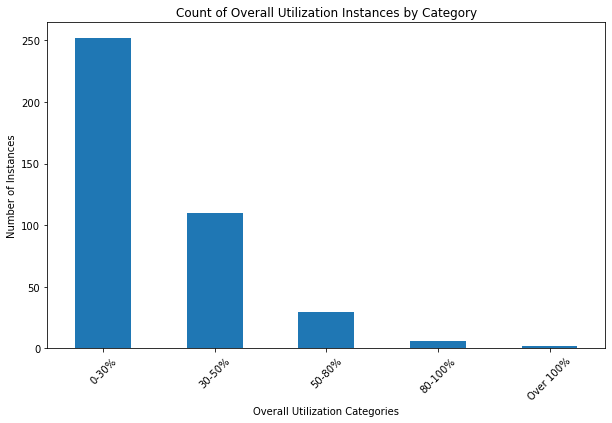

In [127]:
utilization_counts = inspect_station['utilization_category'].value_counts().reindex(labels)
plt.figure(figsize=(10, 6))
utilization_counts.plot(kind='bar')
plt.title('Count of Overall Utilization Instances by Category')
plt.xlabel('Overall Utilization Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

In [128]:
inspect_station['max_utilisation'] = inspect_station[['utilisation_rate_taken(%)', 'utilisation_rate_returned(%)']].max(axis=1)
inspect_station['dock_sufficiency'] = [
    'underutilized' if x <= 30 else
    'utilized' if 31 <= x < 70 else
    'good' if 70 <= x <= 80 else
    'max utilized' if 81 <= x <= 100 else
    'over utilized' for x in inspect_station['max_utilisation']
]



In [129]:
inspect_station

,station_id,average_hourly_bikes_taken,average_hourly_bikes_returned,average_half_hourly_bikes_taken,average_half_hourly_bikes_returned,mean_of_top_10_taken,mean_of_top_10_returned,Name,Latitude,Longitude,...,utilisation_rate_taken(%),utilisation_rate_returned(%),peak_utilisation_rate_taken(%),peak_utilisation_rate_returned(%),imbalance_rate,peak_imbalance_rate,overall_utilization,utilization_category,max_utilisation,dock_sufficiency
0,M32006,15.042453,15.193396,7.985810,8.065943,30.9,28.5,MIT at Mass Ave / Amherst St,42.358100,-71.093198,...,29.577073,29.873864,114.444444,105.555556,0.296791,8.888889,85.917641,80-100%,29.873864,underutilized
1,M32018,11.148325,11.475279,5.948936,6.123404,21.0,21.9,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,...,31.310190,32.228443,110.526316,115.263158,0.918253,4.736842,88.557111,80-100%,32.228443,utilized
2,M32011,10.611940,10.458422,5.760417,5.677083,23.4,22.8,Central Square at Mass Ave / Essex St,42.365070,-71.103100,...,30.317982,29.879386,123.157895,120.000000,0.438596,3.157895,94.134868,80-100%,30.317982,over utilized
3,M32037,9.443203,10.437616,5.287800,5.844630,64.5,51.5,Ames St at Main St,42.362500,-71.088220,...,27.830525,30.761210,339.473684,271.052632,2.930684,68.421053,222.472971,Over 100%,30.761210,over utilized
4,M32041,9.014354,8.840510,4.868217,4.774332,18.6,18.4,MIT Pacific St at Purrington St,42.359573,-71.101295,...,25.622195,25.128066,97.894737,96.842105,0.494129,1.052632,75.770434,50-80%,25.622195,underutilized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,E32013,0.500000,0.500000,0.500000,0.500000,1.0,1.0,Hyde Park Library,42.256838,-71.122509,...,3.333333,3.333333,6.666667,6.666667,0.000000,0.000000,5.666667,0-30%,3.333333,underutilized
396,H32006,0.477612,0.641791,0.457143,0.614286,1.0,1.4,855 Broadway,42.398418,-71.023909,...,4.155844,5.584416,9.090909,12.727273,1.428571,3.636364,9.097403,0-30%,5.584416,underutilized
397,C32094,0.430233,0.604651,0.430233,0.604651,1.1,1.0,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,...,2.530780,3.556772,6.470588,5.882353,1.025992,0.588235,5.236662,0-30%,3.556772,underutilized
398,T32012,0.380000,0.900000,0.365385,0.865385,1.1,2.0,Salem MBTA - Lower Level,42.523994,-70.896840,...,3.321678,7.867133,10.000000,18.181818,4.545455,8.181818,11.541958,0-30%,7.867133,underutilized


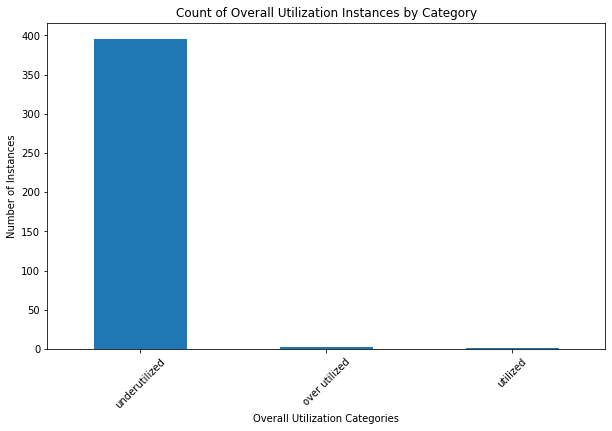

In [130]:
utilization_counts = inspect_station['dock_sufficiency'].value_counts()
utilization_counts

plt.figure(figsize=(10, 6))
utilization_counts.plot(kind='bar')
plt.title('Count of Overall Utilization Instances by Category')
plt.xlabel('Overall Utilization Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

In [131]:
inspect_station['peak_max_utilisation'] = inspect_station[['peak_utilisation_rate_taken(%)', 'peak_utilisation_rate_returned(%)']].max(axis=1)
inspect_station['peak_dock_sufficiency'] = [
    'underutilized' if x <= 30 else
    'utilized' if 31 <= x < 70 else
    'good' if 70 <= x <= 80 else
    'max utilized' if 81 <= x <= 100 else
    'over utilized' for x in inspect_station['peak_max_utilisation']
]


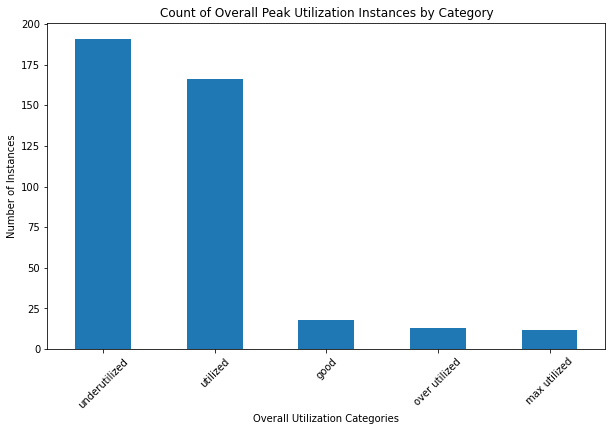

In [132]:
peak_utilization_counts = inspect_station['peak_dock_sufficiency'].value_counts()
peak_utilization_counts
plt.figure(figsize=(10, 6))
peak_utilization_counts.plot(kind='bar')
plt.title('Count of Overall Peak Utilization Instances by Category')
plt.xlabel('Overall Utilization Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

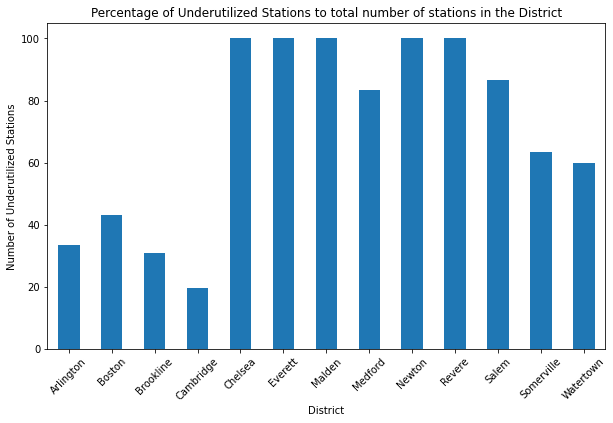

In [133]:
underutilized_inspect_station = inspect_station[inspect_station['peak_dock_sufficiency']=='underutilized']
underutilized_district_counts = underutilized_inspect_station['District'].value_counts()
total_district_counts = inspect_station['District'].value_counts()
percentage_underutilized = (underutilized_district_counts / total_district_counts) * 100

plt.figure(figsize=(10, 6))
percentage_underutilized.plot(kind='bar')
plt.title('Percentage of Underutilized Stations to total number of stations in the District')
plt.xlabel('District')
plt.ylabel('Number of Underutilized Stations')
plt.xticks(rotation=45)
plt.show()